<center><h1>𝓑𝓪𝓰 𝓸𝓯 𝔀𝓸𝓻𝓭𝓼 👜</h1></center>

<center><img src="https://miro.medium.com/max/661/1*3K9GIOVLNu0cRvQap_KaRg.png" width="600"/></center>

It is also one of the techniques that help to convert the **text** to **vectors**. Here we are going to see about the **BOW** (**B**ag **O**f **W**ords). 

## BOW: 
The bag-of-words (BOW) model is a representation that turns arbitrary text into fixed-length vectors by counting how many times each word appears. This process is often referred to as vectorization.


Let’s understand this with an example. Suppose we wanted to vectorize the following:

* the cat sat
* the cat sat in the hat
* the cat with the hat
We’ll refer to each of these as a text document.


### Step 1: Determine the Vocabulary
Now we have a three documents. We need to get the unique words for our vocabulaires. 

Vocabulary: `[the, cat, sat, in, the, hat, with]`

### Step 2: Count
* To vectorize our documents, all we have to do is count how many times each word appears. 
* For example: `cat` appreas two times in a single document we refer the `cat` with `2`. If the word not apperas we refer the word with `0`. 

<center><img src="https://miro.medium.com/max/1400/1*3IACMnNpwVlCl8kSTJocPA.png" width="600"/></center>

Now we have length-6 vectors for each document!

* the cat sat: `[1, 1, 1, 0, 0, 0]`
* the cat sat in the hat: `[2, 1, 1, 1, 1, 0]`
* the cat with the hat: `[2, 1, 0, 0, 1, 1]`

The vector size is based on the vocabulary size what you have!, The implementation wise there are many methods available, Let's see some of the methods!

In [28]:
# corpus = "3000Python is an interpreted, object-oriented, high-level programming language with dynamic semantics. Its high-level built in data structures, combined with dynamic typing and dynamic binding, make it very attractive for Rapid Application Development, as well as for use as a scripting or glue language to connect existing components together. Python's simple, easy to learn syntax emphasizes readability and therefore reduces the cost of program maintenance. Python supports modules and packages, which encourages program modularity and code reuse. The Python interpreter and the extensive standard library are available in source or binary form without charge for all major platforms, and can be freely distributed.Often, programmers fall in love with Python because of the increased productivity it provides. Since there is no compilation step, the edit-test-debug cycle is incredibly fast. Debugging Python programs is easy: a bug or bad input will never cause a segmentation fault. Instead, when the interpreter discovers an error, it raises an exception. When the program doesn't catch the exception, the interpreter prints a stack trace. A source level debugger allows inspection of local and global variables, evaluation of arbitrary expressions, setting breakpoints, stepping through the code a line at a time, and so on. The debugger is written in Python itself, testifying to Python's introspective power. On the other hand, often the quickest way to debug a program is to add a few print statements to the source: the fast edit-test-debug cycle makes this simple approach very effective."

corpus = "I love NLP and I love build the Bag of words model on my own. This is my desire to do"

### 1. Using NLTK

Importing Libraries

In [1]:
import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 

In [2]:
# Initialzing the classes 

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

### Cleaning of text

* Step:1 (lowering the sentences) 
* Step:2 (Split the sentences) 
* Step:3 (Remove Stop words and stem or lemm the word) 
* Step:4 (Join the words) 


In [31]:
Sentences = nltk.sent_tokenize(corpus)  # sentence tokenization 
new_corpus = []   # Storing all our cleaned words 

In [32]:
import re # Regular Expression:: 

for i in range(len(Sentences)):
    new = re.sub('[^a-zA-Z]', ' ', Sentences[i])  # Sub is a method help to replace!
    # It means apart from small a-z and A-Z it will remove all the things, for apart(^) symbol like that. 
    new = new.lower()
    new = new.split()   # Whenever we are doing split, we get list of words, same like word tokenize 
    new = [lemmatizer.lemmatize(convert) for convert in new if convert not in set(stopwords.words('english'))]
    new = ' '.join(new)
    new_corpus.append(new)

In [33]:
new_corpus  

['love nlp love build bag word model', 'desire']

Let's create bag of words! 
* (It is a vector right?)

**CountVectorizer**

In [9]:
from sklearn.feature_extraction.text import CountVectorizer   

cv = CountVectorizer()  # Initialize the class
x = cv.fit_transform(new_corpus).toarray()  # fit and transform our text to the model 

In [14]:
import warnings
import seaborn as sns
from IPython import display   # This is for svg image as output 
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
display.set_matplotlib_formats('svg')

cleaned corpus ['love nlp love build bag word model', 'desire']


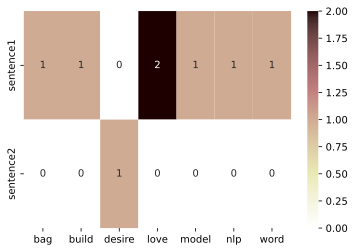

In [40]:
sns.heatmap(x, annot=True, cbar = True, xticklabels = cv.get_feature_names(), yticklabels = ['sentence1', 'sentence2'], cmap = 'pink_r');
print('cleaned corpus', new_corpus)

In [12]:
# let's do it in function: 
import re
def cleaner(sentences):
    new_corpus = []
    for i in range(len(sentences)):
        new = re.sub('[^a-zA-Z]', ' ', sentences[i])  # Sub is a method help to replace!
        # It means apart from small a-z and A-Z it will remove all the things, for apart(^) symbol like that. 
        new = new.lower()
        new = new.split()   # Whenever we are doing split, we get list of words, same like word tokenize 
        new = [lemmatizer.lemmatize(convert) for convert in new if convert not in set(stopwords.words('english'))]
        new = ' '.join(new)
        new_corpus.append(new)
        
    return new_corpus

def vectorizer(text):
    clean_text = cleaner(text)  # clean the text 
    cv = CountVectorizer()  # Initialize the class
    x = cv.fit_transform(clean_text).toarray()  # fit and transform our text to the model 
    return x, cv.get_feature_names(), clean_text 

cleaned corpus ['saw perfect love love love love saw perfect loved even', 'best thing hold onto life']


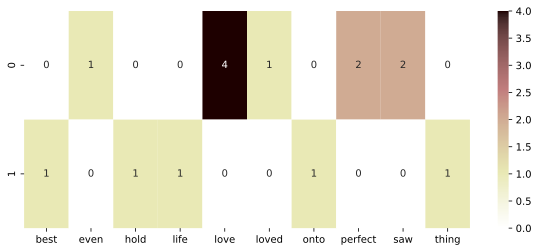

In [16]:
# corpus 
corpus = ['I saw that you were perfect, and so I love love love love you. Then I saw that you were not perfect and I loved you even more.',\
          'he best thing to hold onto in life is each other.']

# vectorizing it 
vector, feature_name, clean_text = vectorizer(corpus) 

# visualize it: 
plt.figure(figsize=(10,4))
sns.heatmap(vector, annot=True, cbar = True, xticklabels = feature_name, cmap = 'pink_r');
print('cleaned corpus', clean_text)

### 2. Keras

Vocabulary: ['the', 'cat', 'sat', 'hat', 'in', 'with']

Vectors:
 [[0. 1. 1. 1. 0. 0. 0.]
 [0. 2. 1. 1. 1. 1. 0.]
 [0. 2. 1. 0. 1. 0. 1.]]


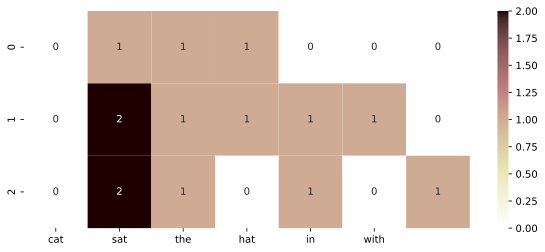

In [27]:
from keras.preprocessing.text import Tokenizer

docs = [
  'the cat sat',
  'the cat sat in the hat',
  'the cat with the hat',
]

## Step 1: Determine the Vocabulary
tokenizer = Tokenizer()
tokenizer.fit_on_texts(docs)
print(f'Vocabulary: {list(tokenizer.word_index.keys())}')

## Step 2: Count
vectors = tokenizer.texts_to_matrix(docs, mode='count')
print(f'\nVectors:\n {vectors}')
      
## Step 3: visualize it! 
plt.figure(figsize=(10,4))
sns.heatmap(vectors, annot=True, cbar = True, xticklabels = tokenizer.word_docs.keys(), cmap = 'pink_r');
    

<center><img src="https://thumbs.gfycat.com/UncomfortableHatefulKakarikis-size_restricted.gif" width="600"/></center>